In [3]:
# Necessary imports
import numpy as np
import cv2
import glob

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from skimage.feature import hog

from scipy.ndimage.measurements import label

from utils import *

# Read in images and create classes for cars and non cars

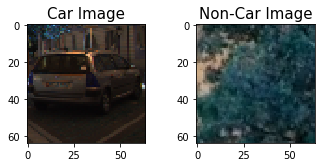

In [4]:
# Read in cars and non cars 

# Standard dataset
cars = glob.glob('vehicles/*/*.png')
non_cars = glob.glob('non-vehicles/*/*.png')

# Randomly display a car and non car image
random = np.random.randint(0, len(cars))
car_img = cv2.imread(cars[random])
non_car_img = cv2.imread(non_cars[random])

ShowTwoImages(car_img, non_car_img, "Car Image", "Non-Car Image")

# Sample HOG detection and visualization

/academics/conda/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


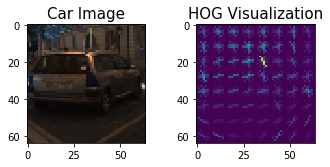

In [5]:
gray = cv2.cvtColor(car_img, cv2.COLOR_RGB2GRAY)

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Call our function with vis=True to see an image output
# use feature_vec as false for now
features, hog_img = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)



# Plot the examples
ShowTwoImages(car_img, hog_img, "Car Image", "HOG Visualization")

# Extract features and visualize a sample

In [6]:
color_space = 'YCrCb'
spatial_size = (32,32)
hist_bins = 32
hist_range = (0,256)
hog_channel= 'ALL'
spatial_feat = True
hist_feat = True
hog_feat = True

car_features = extract_features(cars, orient, pix_per_cell, cell_per_block, 
                                cspace=color_space, spatial_size=spatial_size,
                                hist_bins=hist_bins, hist_range=hist_range,
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)
non_car_features = extract_features(non_cars, orient, pix_per_cell, cell_per_block, 
                                cspace=color_space, spatial_size=spatial_size,
                                hist_bins=hist_bins, hist_range=hist_range,
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)


/academics/conda/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [7]:
# Append and normalize features
X = np.vstack((car_features, non_car_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

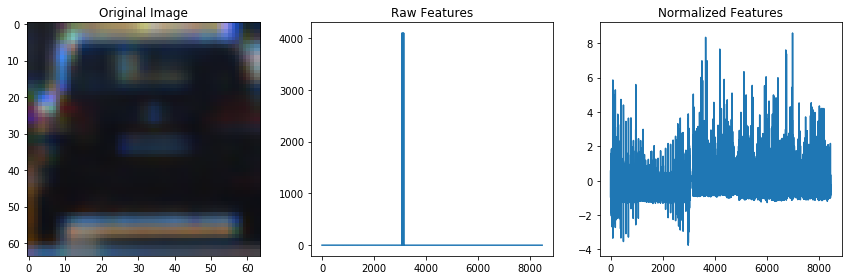

In [8]:
# Plot an example of raw and scaled features
car_ind = np.random.randint(0, len(cars))
fig = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(mpimg.imread(cars[car_ind]))
plt.title('Original Image')
plt.subplot(132)
plt.plot(X[car_ind])
plt.title('Raw Features')
plt.subplot(133)
plt.plot(scaled_X[car_ind])
plt.title('Normalized Features')
fig.tight_layout()


# Randomize samples and add labels

In [9]:
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(non_car_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460


# Train Classifier

In [10]:
import time

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

46.97 Seconds to train SVC...
Test Accuracy of SVC =  0.9916


# Check result on a sample image

/academics/conda/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


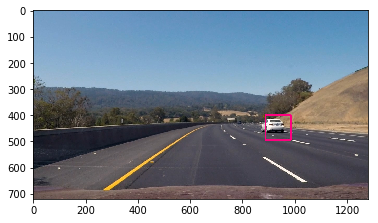

In [11]:
def test_sample_image(image):
    windows = slide_window(image, x_start_stop=[600, 1280], y_start_stop=[400, 720], 
                        xy_window=(96, 96), xy_overlap=(0.5, 0.5))

    # Return all the windows the classifier has predicted contain car(s) ('positive windows').
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

    # Draw bounding boxes around the windows that the classifier predicted has cars in them
    window_img = draw_boxes(image, hot_windows, color=(1, 0, 0.5), thick=6)                    
    return window_img, hot_windows

# Read in image
test_image_number = 3
test_image = mpimg.imread('test_images/test' + str(test_image_number) + '.jpg')
test_image = test_image.astype(np.float32)/255

window_img, hot_windows = test_sample_image(test_image)
    
# Plot image with bounding boxes drawn.
plt.imshow(window_img)

In [155]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars_local(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    bbox_list=[]
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    offset = 15
    
    img_tosearch = img[ystart:ystop,260:,:]
    ctrans_tosearch =  cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
        
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale) - offset + 260
                ytop_draw = np.int(ytop*scale) - offset
                win_draw = np.int(window*scale) + 2*offset
                bbox = [(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)]
                cv2.rectangle(draw_img,bbox[0], bbox[1],(0.9,0.9,1.0),6) 
                bbox_list.append(bbox)
            
                
    return draw_img, bbox_list
    

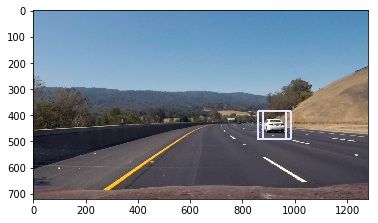

In [156]:
ystart = 400
ystop = 656
scale = 1.2
    
out_img, box_list = find_cars_local(test_image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

plt.imshow(out_img)

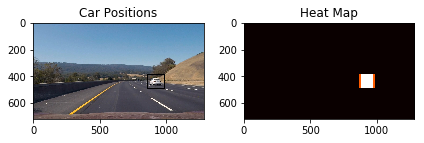

In [157]:
heat = np.zeros_like(test_image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
#heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(test_image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


# Combined function

In [176]:
# Function to find bounding boxes using the find_cars method
def find_bboxes(image):
    scales = [1.5, 1.75, 1.95]
    starts = [400, 440, 440]
    stops =  [656, 600, 656]
    box_list = []
    for cnt in range(len(scales)):
        out_img, box_list_i = find_cars_local(image, starts[cnt], stops[cnt], scales[cnt], svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        box_list.extend(box_list_i)  
    
    return box_list

# Draws filtered bounding boxes based on the threshold generated heat map
def draw_filtered_bboxes(image, all_bboxes, threshold=15): 
    # Prepare heatmap template
    heat = np.zeros_like(image[:,:,0])
    
    # Add heat to each box in box list
    for boxlist in all_bboxes:
        heat = add_heat(heat,boxlist)
    
    # Apply threshold
    heat = apply_threshold(heat, threshold)
    
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    
    # Label regions
    labels = label(heatmap)
    
    # Draw bounding boxes around labelled regions
    draw_img = draw_labeled_bboxes(np.copy(image), labels)    
    return draw_img

all_bboxes = []
def process_image(image):
    global all_bboxes
    bbox_frame = find_bboxes(image)
    if(len(all_bboxes) >= 20):
        all_bboxes.pop(0)
    all_bboxes.append(bbox_frame)
    return draw_filtered_bboxes(image, all_bboxes)

# Test video

In [177]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

output = 'project_output_video_test_full.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("project_video.mp4").subclip(40,44)
clip1 = VideoFileClip("project_video.mp4")
output_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video project_output_video_test_full.mp4
[MoviePy] Writing video project_output_video_test_full.mp4


100%|█████████▉| 1260/1261 [14:28<00:00,  1.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_output_video_test_full.mp4 

CPU times: user 13min 19s, sys: 51.9 s, total: 14min 11s
Wall time: 14min 30s
